# Lab 5. Fuzzy Systems
# Task 5.1 The Tipping Problem
## Problem Descriptions


We have three linguistic variables (2 inputs and 1output):

food: poor, average, good

service: poor, average, good

tip: low, medium, high

following are the rules for fuzzy system:
Rules:--

* IF the service was good

 OR the food quality was good

 THEN the tip will be high.

* IF the service was average

  THEN the tip will be medium.

* IF the service was poor

  AND the food quality was poor

  THEN the tip will be low.

## Implementation and Results



In [1]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=cf2f6dd3c083a7d63e853edd2dd8cf399ed4daf3681bc1b127b855eacb7c711a
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


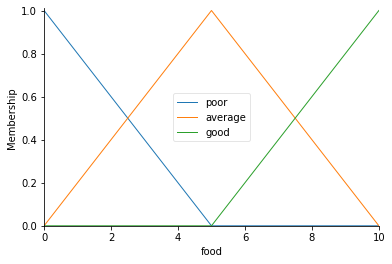

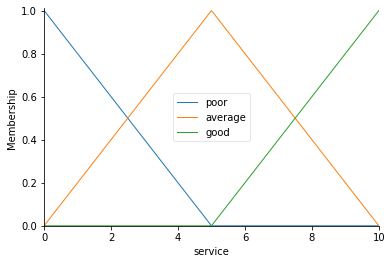

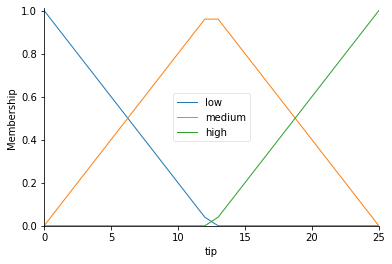

In [3]:
# New Antecedent/Consequent objects hold universe variables and membership functions
food = ctrl.Antecedent(np.arange(0, 11, 1), 'food')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Auto-membership function population is possible with .automf(3, 5, or 7)
food.automf(3)
service.automf(3)
tip.automf(3, names=['low', 'medium', 'high'])

food.view()
service.view()
tip.view()

In [4]:
# Define the rules
rule1 = ctrl.Rule(food['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | food['good'], tip['high'])

# Create the control system and its simulation
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

Suggested tip: 19.76409495548962 %


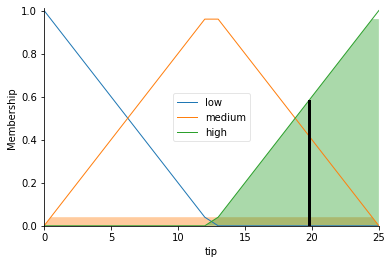

In [5]:
# Pass inputs to the ControlSystem 
tipping.inputs({'food': 6.5, 'service': 9.8})

# Crunch the numbers
tipping.compute()
print("Suggested tip:", tipping.output['tip'], "%")
tip.view(sim=tipping)


## Discussions


fuzzzification:  bases on liguistic variables we do fuzzification of rules.

we have used skfuzzy library for predefined fuzzy functions.


defuzification method:- Defuzzification is the process of obtaining a single number from the output of the aggregated fuzzy set.

the input to our system is as follows:--

food quality is : 6.5

service quality is: 9.8 

tip : 19.7

